

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.below column description of the dataset
<ul>
<li>id, imdb_id : unique id or imdb id for each movie on TMDB (more about the popularity in this link.</li>
<li>popularity: a metric used to measure the popularity of the movie.</li>
<li>budget:the total budget of the moviein USD.</li>
<li>revenue:the total revenue of the movie in USD.</li>
<li>original_title: the original title of the movie.</li>
<li>cast:the names of the cast of the movie separated by "|".</li>
<li>homepage: the website of the movie (if it existed)</li> 
<li>director:name(s) of the director(s) of the movie (separated by "|" if there are more than one director)</li>
<li>tagline:a catchphrase describing the movie</li>     
<li>keywords: keywords related to the movie.</li> 
<li>overview:summary of the plot of the movie.</li> 
<li>runtime:total runtime of the movie in minutes.</li> 
<li>genres: genres of the movie separated by "|".</li> 
<li>production_companies:production compan(y/ies) of the movie.</li>  
<li>release_date:release date of the movie.</li> 
<li>vote_count:number of voters of te movie.</li> 
<li>vote_average:the average user rating of the movie</li> 
<li>release_year:release year of the movie (from 1960 to 2015)</li> 
<li>budget_adj:the total budget of the moviein USD in terms of 2010 dollars, accounting for inflation over time.</li>     
<li>revenue_adj:the total budget of the movie in USD in terms of 2010 dollars, accounting for inflation over time.</li> 
</ul>


### Question(s) for Analysis
###### Question 1.1 Which movies genres are most popular over the years depending on average vote?
###### Question 1.2 Which genres are most popular over the years?
###### Question 1.3 which movie genres earned the highet revenue?
###### Question 1.4 Which movie genres earend the highest profit?
###### Question 2.1 Which are  the 10 top movies that achieved the highest revenue?
###### Question 2.2 what are the top 10 movies depending on their budjet?
###### Question 2.3 what are the top 10  movies have the highest populrity?
###### Question 2.7 Which are the top 10 movies  depending on average vote?

### Importing Needed packages

In [31]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [32]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

Loading and reading the data

In [111]:
# loading the dataset
df=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')

### Data Cleaning

Exploring the dataset

In [34]:
#checking dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [112]:
#Explore column names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Explore the dimention of the dataset

In [113]:
df.shape

(10866, 21)

this dataset contains 10866 rows and 21 columns as shown above

By the below code the unused columns and less significant columns wil be removed from the data set

In [115]:
# Remove less signifacnt columns in the dataset
df.drop(['id','imdb_id','homepage','tagline','overview','production_companies','keywords','director'], inplace=True, axis=1)

In [116]:
#checking the dataframe after removing less significant columns
df.head(1)

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### 1-Removing Duplicated Values

In [38]:
#checking if any duplicated values and removing them if exist
df.duplicated().sum()

1

In [39]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
#No duplicated Values exist

0

###  2-Null Values Handling

By using below method we will get brief summary of the dataset and we can identify if there are null values or not

In [117]:
#display brief summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


its clear from the above summary that the cast and genres columns have null values 

In [118]:
#the cast and genres attributes have null values 
#checking the number of null values 
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

deleting null values as this won't affect the analysis (76 for cast and 23 for genres)

In [119]:
#drop NA Values
df.dropna(inplace=True)
#checking again to make sure that NO Null Values
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

Now, the dataset is free from null values lets check the shape of the dataset again after removing null values

In [121]:
#checking the shape of the dataset after rmoving th null values 
df.shape

(10768, 13)

In [44]:
#checking the data types of dataframe attributes
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

### Descriptive statistics for the dataframe

Let's dispaly concise summary of the dataset

In [122]:
#checking the Descriptive statistics again after removing zeros
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10768.000000,1.076800e+04,1.076800e+04,10768.000000,10768.000000,10768.000000,10768.000000,1.076800e+04,1.076800e+04
mean,0.650919,1.475673e+07,4.018246e+07,102.412426,219.127229,5.967459,2001.284268,1.770819e+07,5.182865e+07
std,1.003519,3.102278e+07,1.174735e+08,30.904737,577.938819,0.931429,12.815589,3.442199e+07,1.452066e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209987,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.386117,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.719231,1.600000e+07,2.476262e+07,112.000000,147.000000,6.600000,2011.000000,2.103337e+07,3.431347e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


After Displaying the dataset summary, we find out that there are zero values at budjet_adj and revenue_adj

In [123]:
# filter out the rows of zero values
df.query('budget_adj != 0 & revenue_adj != 0', inplace=True)

In [124]:
#checking the dimention of the dataframe after removing zeros values
df.shape

(3851, 13)

<a id='eda'></a>
## Exploratory Data Analysis

Create main function for displaying a plot beween different variables

In [49]:
#Create function to display a plot that shows the relationship between mean of numerical variable and a grouped categorical variable.
def attr_features(cat_col,numeric_col,xlabel,ylabel,title_label):
    """
    display a plot that shows the relationship between mean of numerical variable and a grouped categorical variable.

    Args:
        (str) cat_column - categorical variable
        (str) numeric_column - numerical variable
        (str) xlabel - label for x axis
        (str) ylabel - label for y axis
        (str) title_label - label for plot title
    Returns:
        bar plot 
    """
    plot_display=df.groupby(cat_col)[numeric_col].mean().sort_values(ascending=False).plot.bar(width=0.5,figsize=(10,5))
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.title(title_label,fontsize=12)
    return plot_display

###  Question 1.1 Which movies genres are most popular over the years depending on average vote?

 the answer of this question, shows the most popular movie genres from 1960 till 2015 based on average vote

In [125]:
#checking genre column
df['genres']

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

In [126]:
#need to simplify the 'genres' column to be only one word for easy anaysis
#df['genres_major']=df['genres'].apply(lambda x : x[0:x.find('|')]) another method of spliting
#Create Simplified major genres column
df['genres_major']=df['genres'].str.split('|',expand=True)[0]
df['genres_major'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Thriller',
       'Fantasy', 'History', 'Mystery', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

Now, We will call the attr_features function to obtain bar plot that represent the most popular movie genres based on avaerge vote from 1960 till 2015

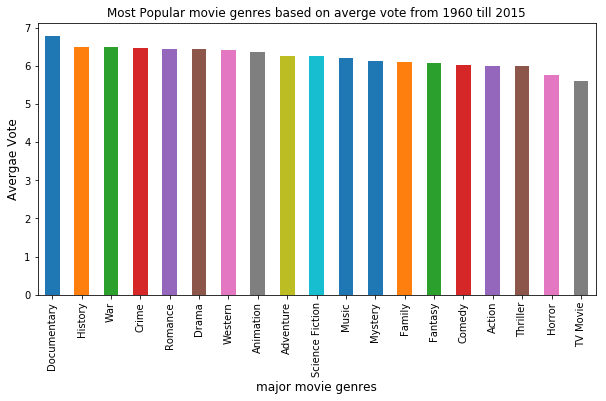

In [51]:
attr_features('genres_major','vote_average','major movie genres','Avergae Vote', 'Most Popular movie genres based on averge vote from 1960 till 2015')

As shown from the above graph, the documnetry genre is most popualar based on average vote, and the TV movie the least popular

### Question 1.2 Which genres are most popular over the years?

After execution below codes you will get the most popular movie genres based on popularity from 1960 till 2015

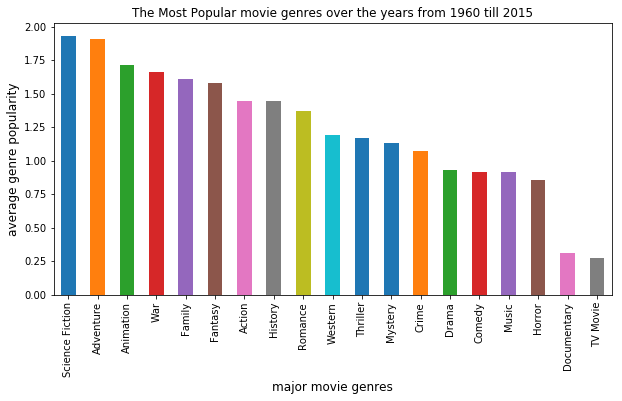

In [52]:
# call the attr_features function 
attr_features('genres_major','popularity','major movie genres','average genre popularity','The Most Popular movie genres over the years from 1960 till 2015')

As shown from the above graph the science fiction,adventure,animation and war are the most popular movie genre 

### Questio 1.3 which movie genres earned the highet revenue?

At this part you will get a plot that shows the movie genre that earned the highest revenue from 1960 till 2015

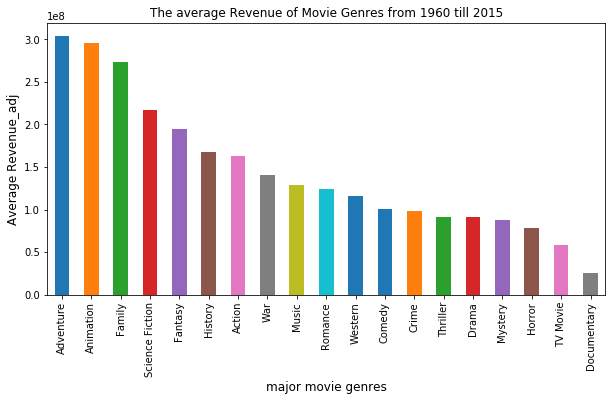

In [53]:
# call the attr_features function 
attr_features('genres_major','revenue_adj','major movie genres','Average Revenue_adj','The average Revenue of Movie Genres from 1960 till 2015')

###  Question 1.4 Which movie genres earend the highest profit?

the profit can be obtained by subtract the budget_adj from the revenu_adj, then we can get movie genres that earned the highest profit as shown in below

In [54]:
#Create Profit column
df['profit']=df['revenue_adj']-df['budget_adj']

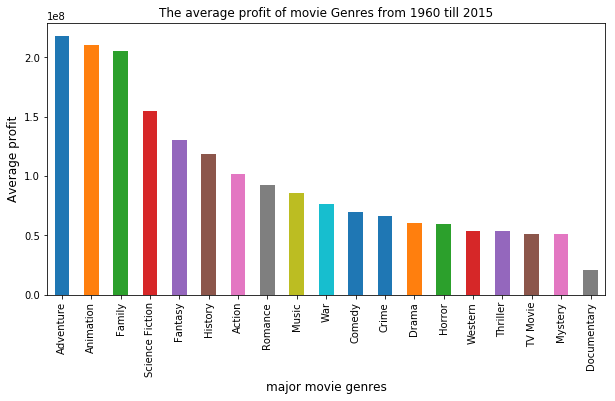

In [55]:
# call the attr_features function 
attr_features('genres_major','profit','major movie genres','Average profit','The average profit of movie Genres from 1960 till 2015')

As shown from the above last two graphs the adventure genre earned the highest profit and revenue and the documentry genre earned the least profit and revenue

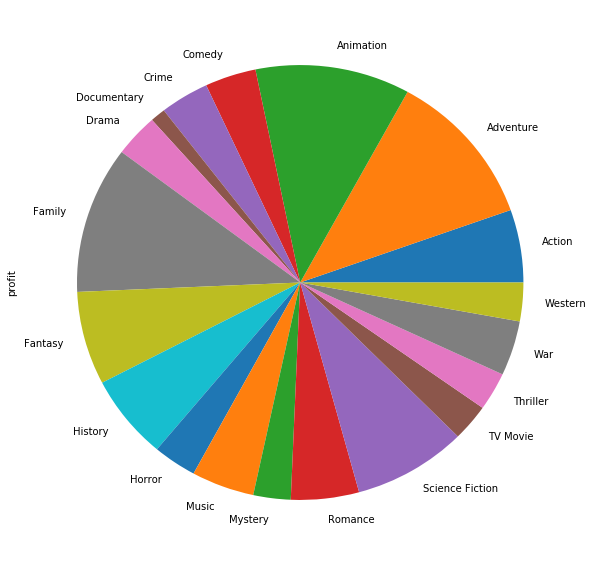

In [56]:
#genre that achieved the highest profit 
#another way of plotting using pie chart
df.groupby('genres_major')['profit'].mean().plot.pie(figsize=(10,10))

### Question 1.5 What are average budget for every movie genre?

At this part we will expolre the average budget for every movie genre from 1960 till 2015

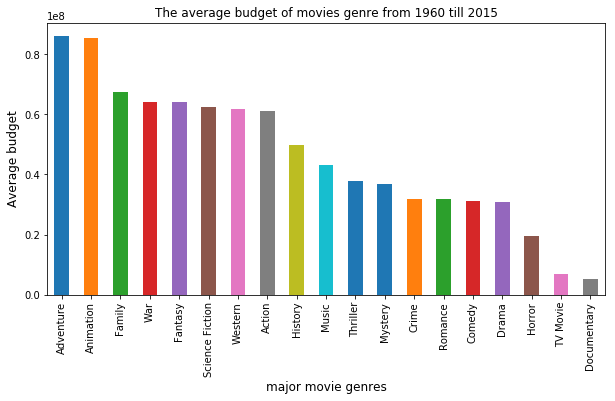

In [30]:
# call the attr_features function 
attr_features('genres_major','budget_adj','major movie genres','Average budget','The average budget of movies genre from 1960 till 2015')

As shown in the above figure, the adventure,animation,family and fantasy are associated with the highest budget

# Explore the top movies title based on different features 

Below we will explore which movies had the highest revenue, profit and budget, the highest and lowest, popularity and average votes. also we will explore the evolution of movies industry from 1960 till 2105 and how many movie produced per each movie genre.

We will create two functions, function to get the top 10 of attribute  and other function to get the least 10 of attribute based on different features  

In [93]:
#Create function to display a plot that shows the top 10 values of attribute based on different features.
def top_features(cat_col,numeric_col,xlabel,ylabel,title_label):
    """
    display a plot that shows the top 10 values of attribute based on different features 

    Args:
        (str) cat_column - categorical variable
        (str) numeric_column - numerical variable
        (str) xlabel - label for x axis
        (str) ylabel - label for y axis
        (str) title_label - label for plot title
    Returns:
        bar plot 
    """
    plot_display=df.groupby(cat_col)[numeric_col].mean().sort_values(ascending=False).head(10).plot.bar(width=0.5,figsize=(10,5))
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.title(title_label,fontsize=12)
    return plot_display

In [94]:
#Create function to display a plot that shows the least 10 values of attribute based on different features.
def least_features(cat_col,numeric_col,xlabel,ylabel,title_label):
    """
    display a plot that shows the least 10 values of attribute based on different features 

    Args:
        (str) cat_column - categorical variable
        (str) numeric_column - numerical variable
        (str) xlabel - label for x axis
        (str) ylabel - label for y axis
        (str) title_label - label for plot title
    Returns:
        bar plot 
    """
    plot_display=df.groupby(cat_col)[numeric_col].mean().sort_values().head(10).plot.bar(width=0.5,figsize=(10,5))
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.title(title_label,fontsize=12)
    return plot_display

### Question 2.1 Which are  the 10 top movies that achieved the highest revenue_adj?

We will call the top_features function to get bar plot that dispaly the top 10 movies based on their adjusted revenue.

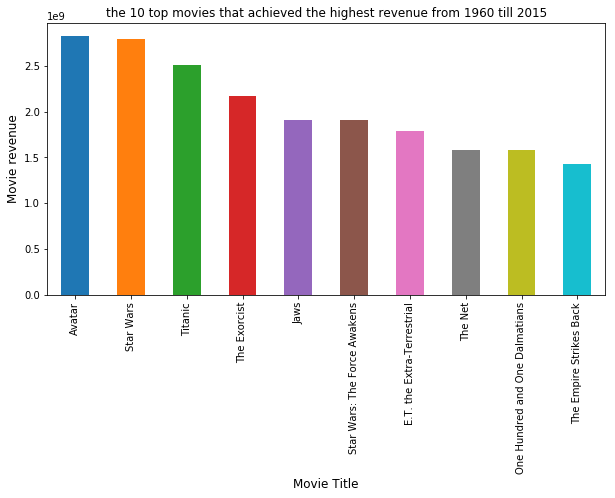

In [95]:
# call the top_features function 
top_features('original_title','revenue_adj','Movie Title','Movie revenue','the 10 top movies that achieved the highest revenue from 1960 till 2015')

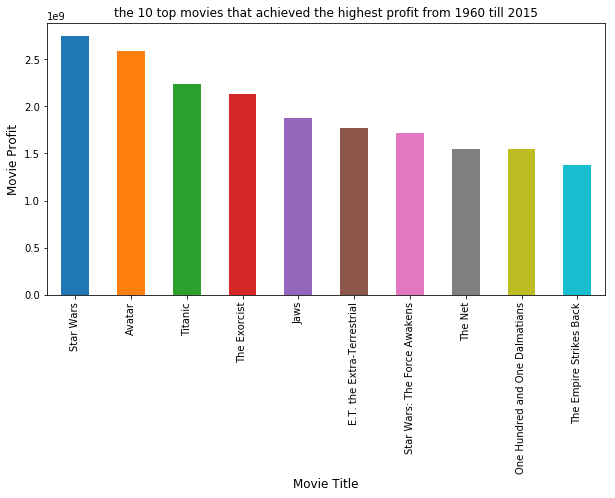

In [96]:
# call the top_features function 
top_features('original_title','profit','Movie Title','Movie Profit','the 10 top movies that achieved the highest profit from 1960 till 2015')

### Question 2.2 what are the top 10 movies depending on their budjet?

We will call the top_features function to get bar plot that dispaly the top 10 movies based on their adjusted budget.

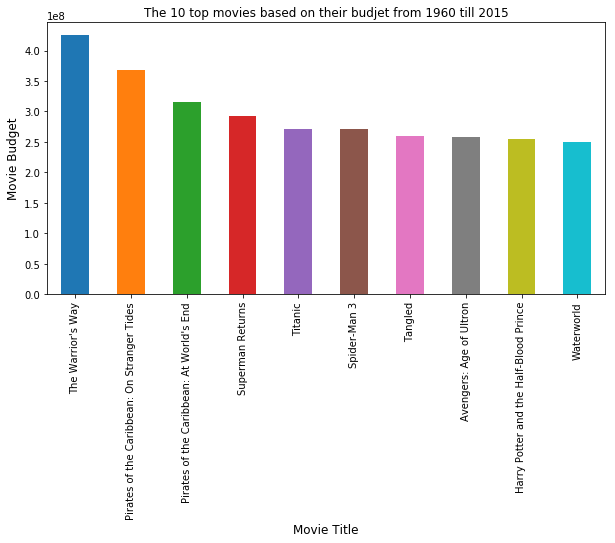

In [99]:
# call the top_features function 
top_features('original_title','budget_adj','Movie Title','Movie Budget','The 10 top movies based on their budjet from 1960 till 2015')

### Question 2.3 what is the corrolation between the movie budjet and profit?

lets check if there any corrolation between budget and profit as below:

In [100]:
#find the corrolation between budjet and profit
corr = df['budget_adj'].corr(df['profit'])
corr

0.40413586449800248

Text(0.5,1,'The corrolation Between The Budjet OF The Movie and  Its profit')

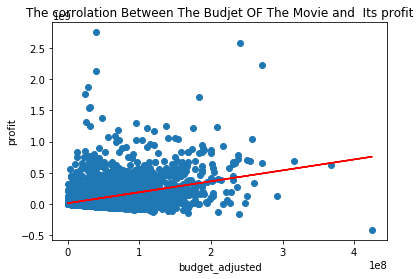

In [101]:
#plotting the corrolation
x=df['budget_adj']
y=df['profit']
#using matplotlib to plot the corrolation between budject and profit
plt.plot(x,y,'o')
#obtain m (slope) and b(intercept) of  line
m, b = np.polyfit(x, y, 1)

#add line to scatterplot 
plt.plot(x, m*x+b, color='red')
plt.xlabel('budget_adjusted')
plt.ylabel('profit')
plt.title('The corrolation Between The Budjet OF The Movie and  Its profit')

 ### Question 2.4  How many movies released per movie genres?

By the below code we can get barplot that represent which genre is associated with the highest number of movies 

Text(0.5,1,'Number of movies released per movie genres')

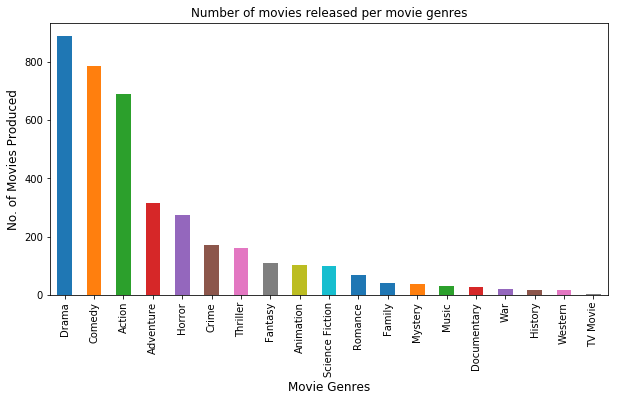

In [102]:
df['genres_major'].value_counts().plot.bar(figsize=(10,5))
plt.xlabel('Movie Genres', fontsize=12)
plt.ylabel('No. of Movies Produced', fontsize=12)
plt.title('Number of movies released per movie genres', fontsize=12)

As shown from the above graph, the drama move genre is representing the highest number of movie produced  

###  Question 2.5 what are the top 10  movies have the highest populrity?

We will call the top_features function to get bar plot that dispaly the top 10 movies based on the popularity.

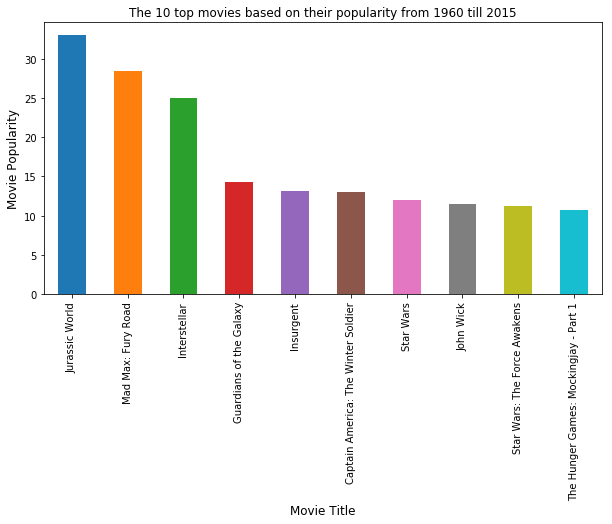

In [103]:
#Call the function tpo_features
top_features('original_title','popularity','Movie Title','Movie Popularity','The 10 top movies based on their popularity from 1960 till 2015')

### Question 2.6 What  are the top 10 movies considered  the lowest popularity?

We will call the function least_features to get bar plot that show the movies of the lowest popularity

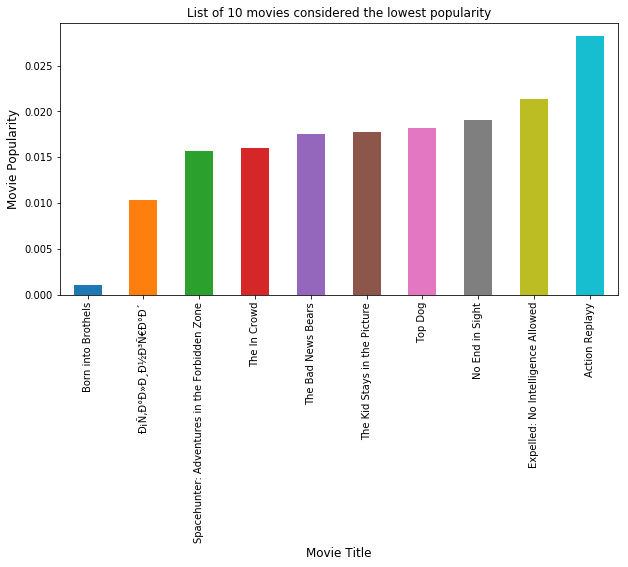

In [105]:
#call the function least_features 
least_features('original_title','popularity','Movie Title','Movie Popularity','List of 10 movies considered the lowest popularity')

### Question 2.7 Which are the top 10 movies  depending on average vote?

We will call the function top_features to get bar plot that show the top 10 movies based on the average vote

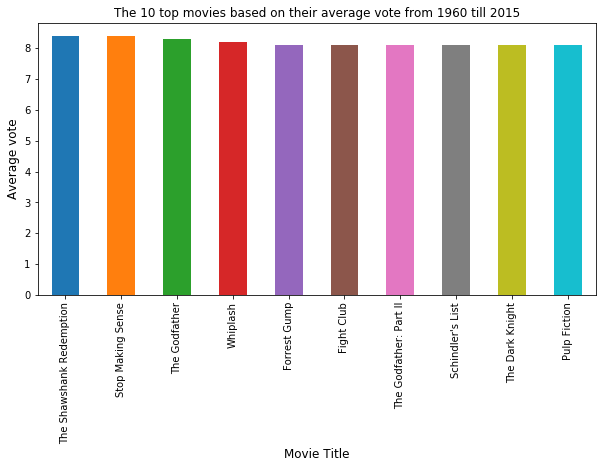

In [107]:
#Calling the function top_features
top_features('original_title','vote_average','Movie Title','Average vote','The 10 top movies based on their average vote from 1960 till 2015')

### Question 2.8 What are the top 10 worst movies depending on their average vote?

We will call the least_features function that create bar plot to display The top 10 worst movies based depending on their average vote

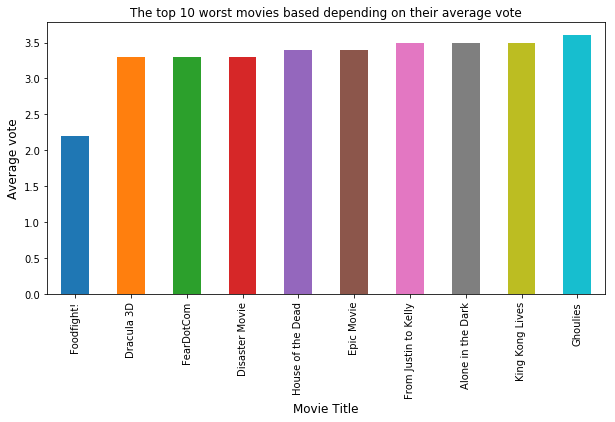

In [91]:
#calling the least_features function
least_features('original_title','vote_average','Movie Title','Average vote','The top 10 worst movies based depending on their average vote')

Let's  find out the corrolation between popularity and average vote as below

In [33]:
#find the corrolation between popularity and averge votr
corr_pop_vote = df['popularity'].corr(df['vote_average'])
corr_pop_vote 

0.31780627387909782

the corrolation value above indicates a weak positive linear relatioship between popularity and the average vote

### Question 2.9 Is there an increse in the produced movies over the years?

By the below code we will count the number of movies produced every year from 1960 till 2015

Text(0.5,1,'The Evolution of movies indusry over the years from 1960 till 2015')

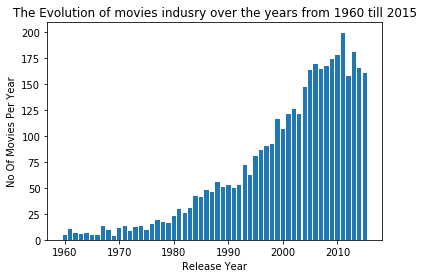

In [34]:
movies_per_year=df['release_year'].value_counts().sort_values(axis=0, ascending=False)
year = movies_per_year.index
No_Of_Movies= list(movies_per_year)
plt.bar(year,No_Of_Movies)
plt.xlabel('Release Year')
plt.ylabel('No Of Movies Per Year')
plt.title('The Evolution of movies indusry over the years from 1960 till 2015')

A shown in the above graph, there is rapidly increase the number of produced movies over the years from 1960 till 2015

In [110]:
#checking the corrolation
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
popularity,1.000000,0.446643,0.615385,0.214956,0.780008,0.317806,0.173470,0.398945,0.546764,0.516728
budget,0.446643,1.000000,0.688433,0.260857,0.556731,0.023730,0.268308,0.958491,0.533274,0.372557
revenue,0.615385,0.688433,1.000000,0.250248,0.754486,0.227122,0.139219,0.657430,0.900848,0.851332
runtime,0.214956,0.260857,0.250248,1.000000,0.273696,0.352119,-0.112537,0.333905,0.280457,0.235213
vote_count,0.780008,0.556731,0.754486,0.273696,1.000000,0.387305,0.207352,0.497719,0.654565,0.613964
vote_average,0.317806,0.023730,0.227122,0.352119,0.387305,1.000000,-0.133377,0.036307,0.266857,0.288759
release_year,0.173470,0.268308,0.139219,-0.112537,0.207352,-0.133377,1.000000,0.075269,-0.103177,-0.132259
budget_adj,0.398945,0.958491,0.657430,0.333905,0.497719,0.036307,0.075269,1.000000,0.570238,0.404136
revenue_adj,0.546764,0.533274,0.900848,0.280457,0.654565,0.266857,-0.103177,0.570238,1.000000,0.981860
profit,0.516728,0.372557,0.851332,0.235213,0.613964,0.288759,-0.132259,0.404136,0.981860,1.000000


<a id='conclusions'></a>
## Conclusions
#### After exploring and analyzing the dataset i found below:
<ul>
<li>The most popular movies genres is science fiction and the least popular is TV movie</li>
<li>The movie genres that associated with the highest budget earned the highet revenue and profit like adventure, science fiction,....</li>
<li>The movie genres that earned the least revenue are documentry, Tv movie are associated with the lowest budget</li>
<li>the most frequent movie genre based on number is drama and the least is tv movie </li>
<li>There is steadily increasing in the number of movies over the yeares from 1960 till 2015</li>
<li>There is high corrolation between popularity and revenue</li>
<li>There is low corrolation between average vote and revenue</li>    
</ul>

## Limitation
<ul>
<li>the cast and genres attributes have null values</li>
<li> There are many missing values(zeros) and all these rows were deleted</li>
</ul>

## Submitting your Project 



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])